# 1.0 | Import libraries

In [1]:
import pandas as pd
import numpy as np
import kagglehub
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, mean_squared_error, f1_score, matthews_corrcoef, roc_auc_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.decomposition import PCA
from time import time
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline


# 2.0 | Import dataset



[Link to dataset](https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/data)

In [2]:
# Download latest version
path = kagglehub.dataset_download("nelgiriyewithana/credit-card-fraud-detection-dataset-2023")

print("Path to dataset files:", path)

100%|██████████| 143M/143M [00:01<00:00, 124MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/versions/1


In [3]:
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        filepath = os.path.join(path, filename)
        try:
            df = pd.read_csv(filepath, index_col=False)
            print(f"Successfully loaded {filename} into a DataFrame.")
            break
        except pd.errors.ParserError:
            print(f"Error parsing {filename}. Skipping this file.")
        except Exception as e:
            print(f"An error occurred while loading {filename}: {e}")

Successfully loaded creditcard_2023.csv into a DataFrame.


In [4]:
df.head(10)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
5,5,0.025302,-0.140514,1.191138,-0.707979,0.430490,0.458973,0.611050,-0.092629,0.180811,...,-0.187739,-0.538518,-0.050465,-0.631553,-0.456480,0.252670,0.066681,0.095812,6901.49,0
6,6,1.016482,-0.397181,0.497868,-0.144463,0.331022,0.629243,0.431262,-0.134007,0.796159,...,-0.171137,-0.287017,-0.178197,-1.297597,1.182503,-0.604228,-0.198163,-0.087619,18954.45,0
7,7,-0.051306,-0.007194,1.139941,-0.877880,0.684668,0.714326,0.892615,-0.908409,0.901938,...,0.620676,-0.920426,0.034660,-1.091527,-0.742075,-0.104863,-1.382522,-2.748268,12298.23,0
8,8,-0.130680,-0.349547,0.425786,-0.760444,1.702777,2.324816,0.568968,0.049100,0.273118,...,-0.132787,-0.284700,-0.227779,2.248754,0.534846,-0.929738,-0.224385,0.243790,22052.90,0
9,9,0.058419,-0.093507,1.117270,-0.735172,0.466111,0.332371,0.683425,-0.136674,0.096409,...,-0.203634,-0.601581,-0.145082,-0.654783,-0.196621,0.226818,0.057119,0.100629,210.35,0


In [5]:
df.tail(10)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568620,568620,-1.604804,0.972534,-1.749894,1.920681,-1.856257,-0.219136,-1.924278,0.089723,-1.563884,...,-0.425927,1.413597,0.702164,-0.468054,-1.723380,0.571744,0.378728,-3.747798,21149.12,1
568621,568621,-0.739211,0.231882,-0.410204,0.511278,0.056859,-0.410720,-0.383799,-0.313642,0.098006,...,0.283048,-0.603132,-0.479224,-0.453026,-0.005507,-1.644165,-0.913953,1.292782,18363.07,1
568622,568622,-0.838047,0.362350,-0.061538,0.252811,-0.006436,-0.222957,0.015602,-0.760310,1.783928,...,0.561658,-0.270249,-0.491720,1.269701,-0.647563,-1.681372,-3.041399,-1.420988,14631.81,1
568623,568623,-0.873853,0.780667,-0.418023,0.399324,0.522744,0.943413,-0.438929,-1.634671,1.776622,...,2.518959,-1.899197,0.721274,0.269306,-0.850062,-0.652306,-0.153297,1.860894,11591.09,1
568624,568624,-0.542349,0.585098,-0.547730,1.005465,-0.702046,-0.287417,-0.835174,0.382365,-1.281525,...,0.463312,0.705032,-0.124074,0.046466,-0.196141,0.553614,1.222537,1.172982,10145.64,1
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1
568629,568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,...,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.92,1


# 3.0 | Dataset Preprocessing

## 3.0.1 | Data Exploration

In [6]:
df.shape

(568630, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [8]:
df.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
df.isna().any()


,0
id,False
V1,False
V2,False
V3,False
V4,False
V5,False
V6,False
V7,False
V8,False
V9,False


In [10]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [11]:
df['Class'].value_counts()

,count
Class,
0,284315
1,284315


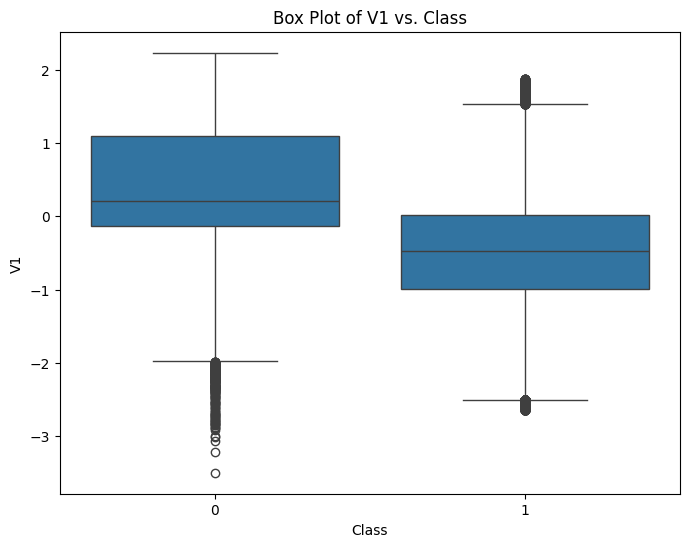

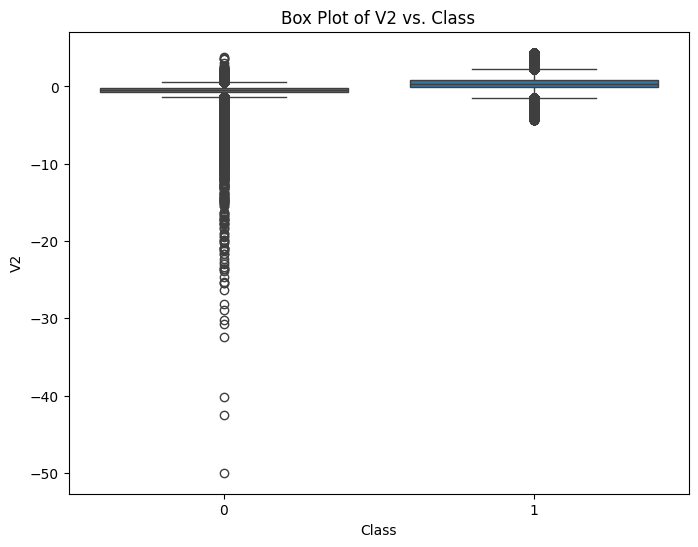

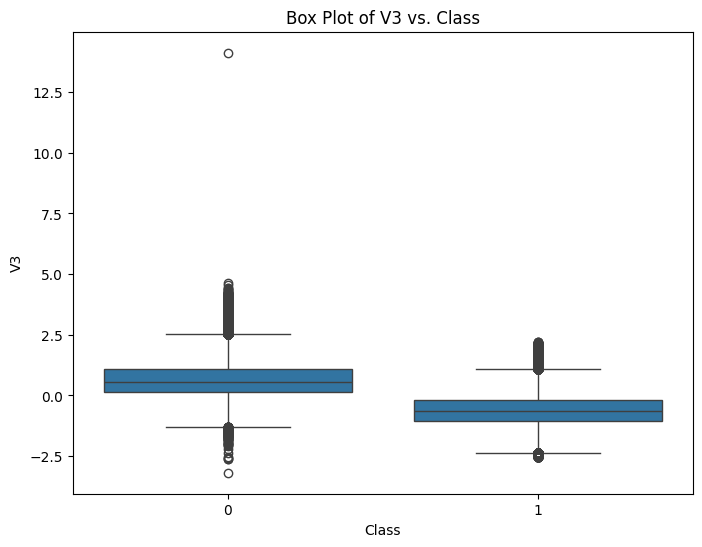

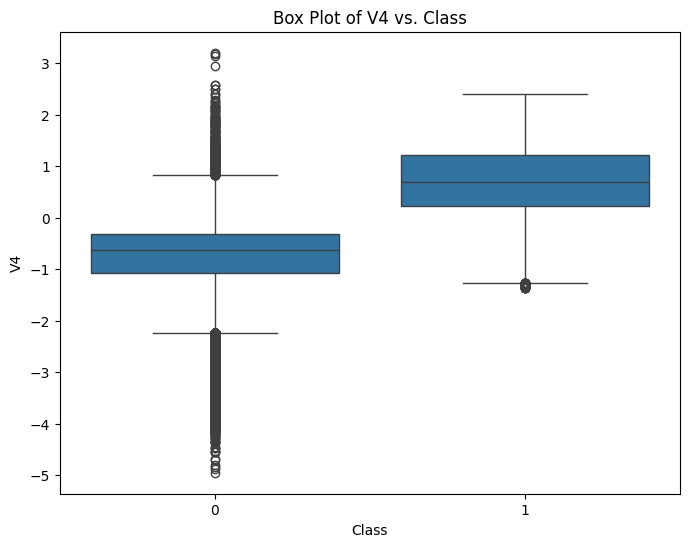

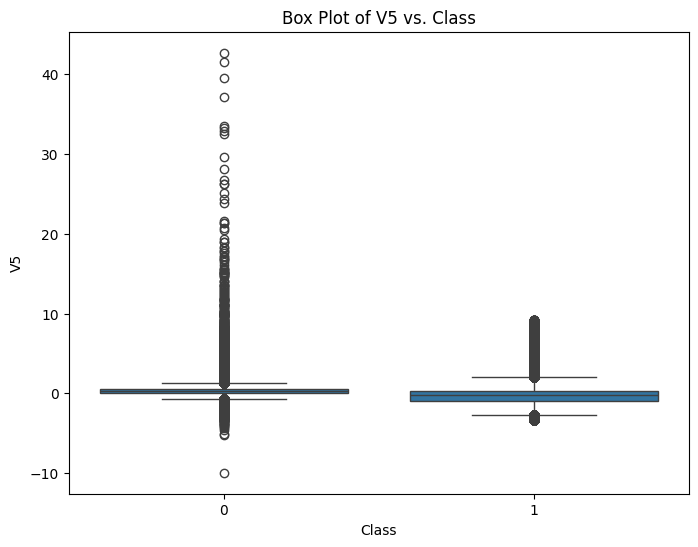

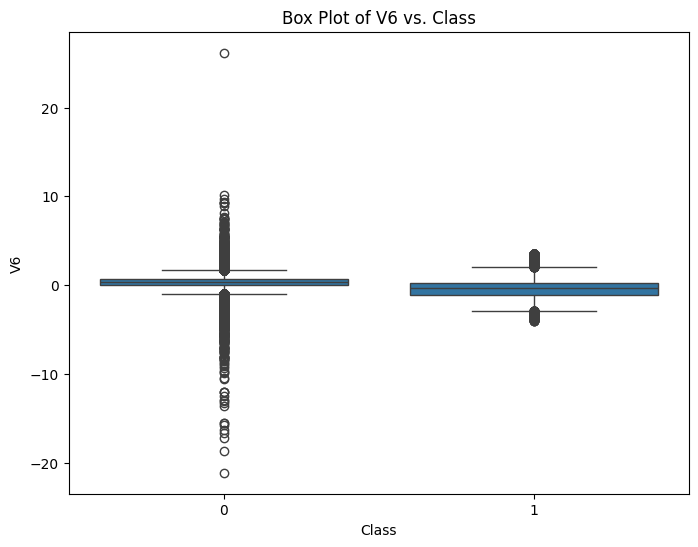

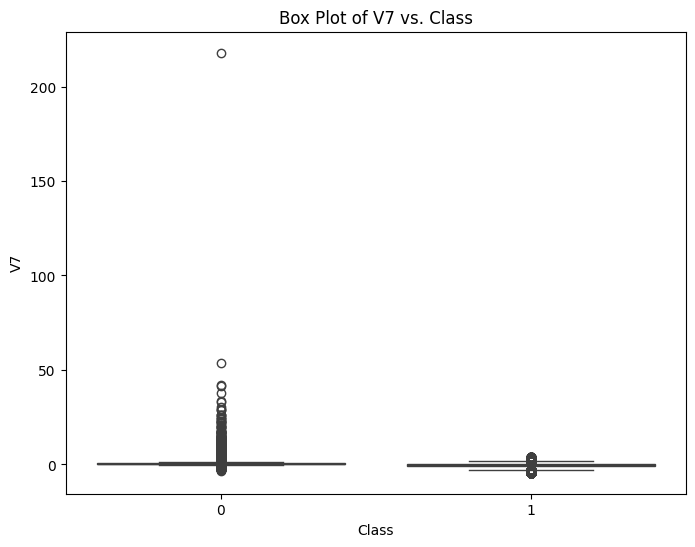

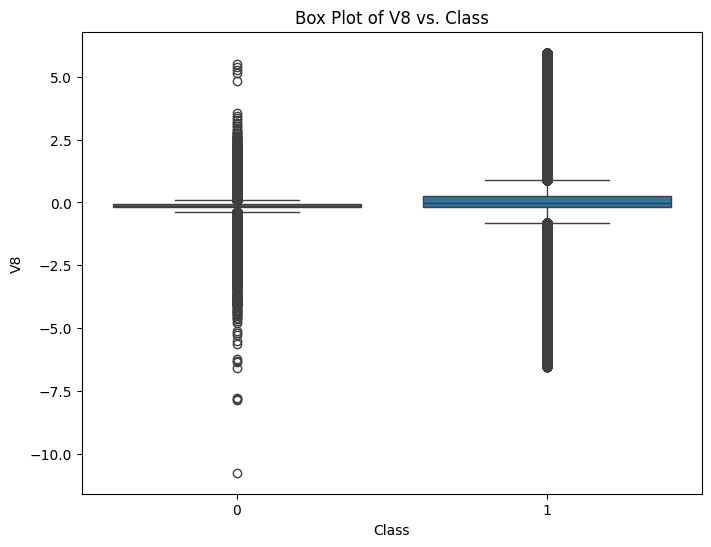

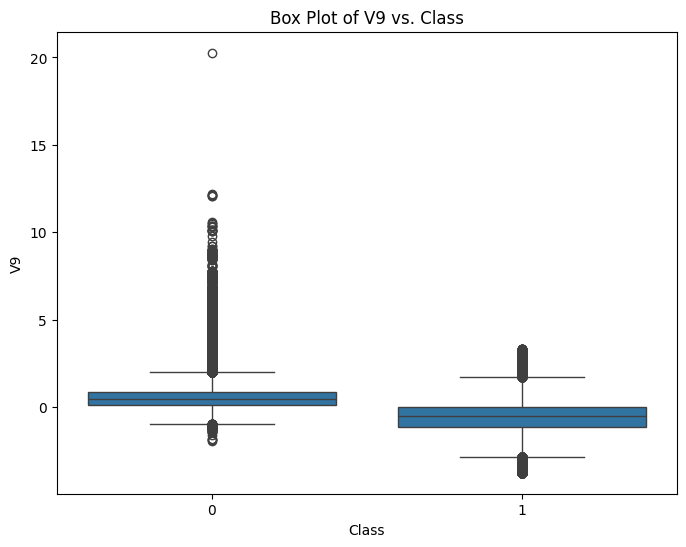

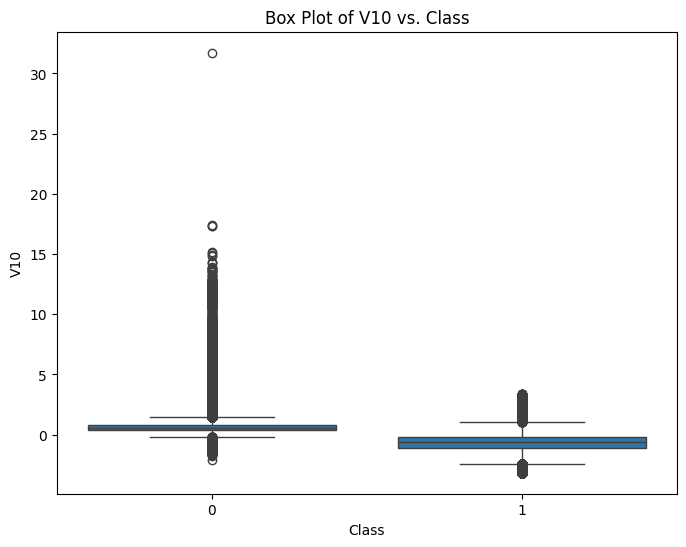

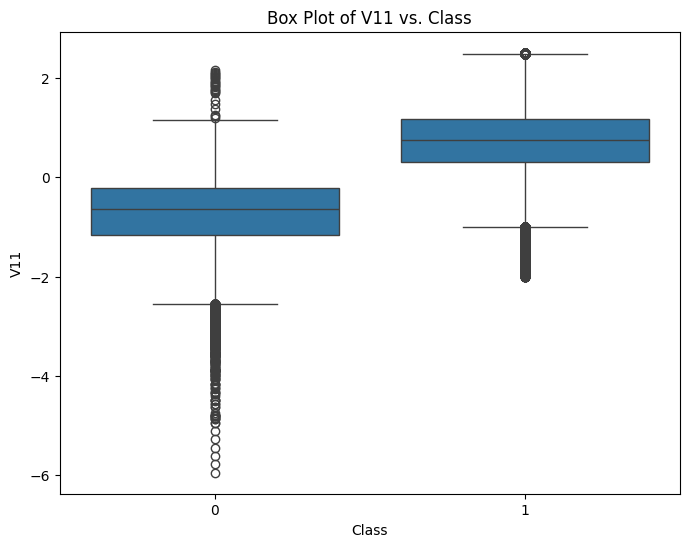

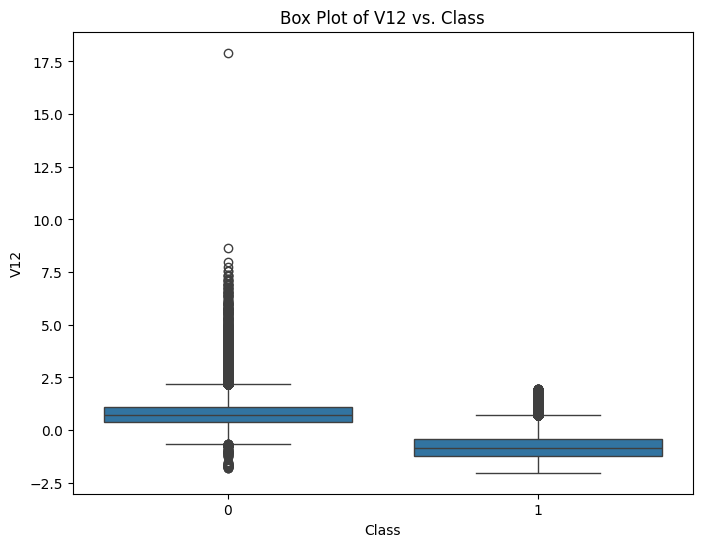

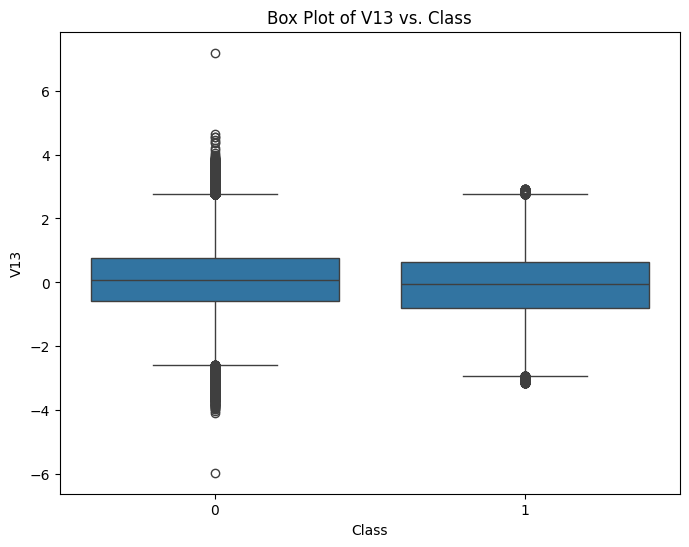

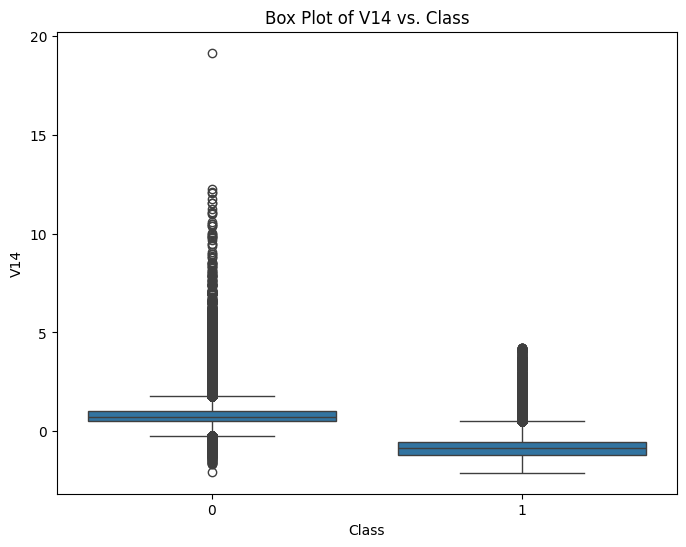

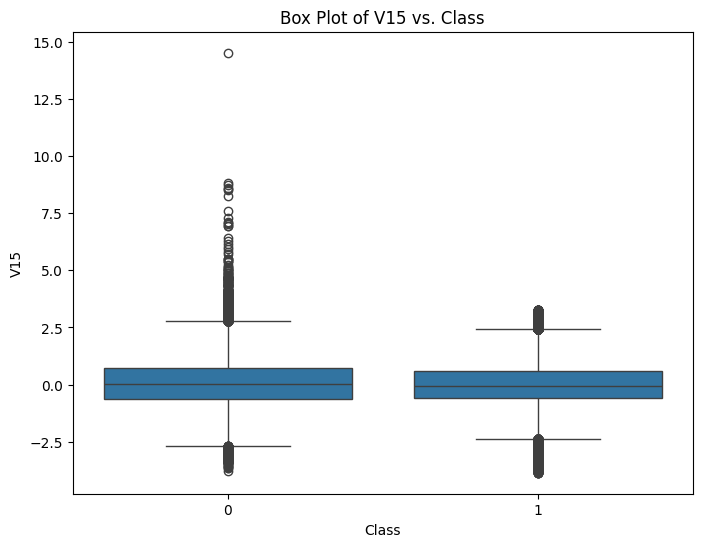

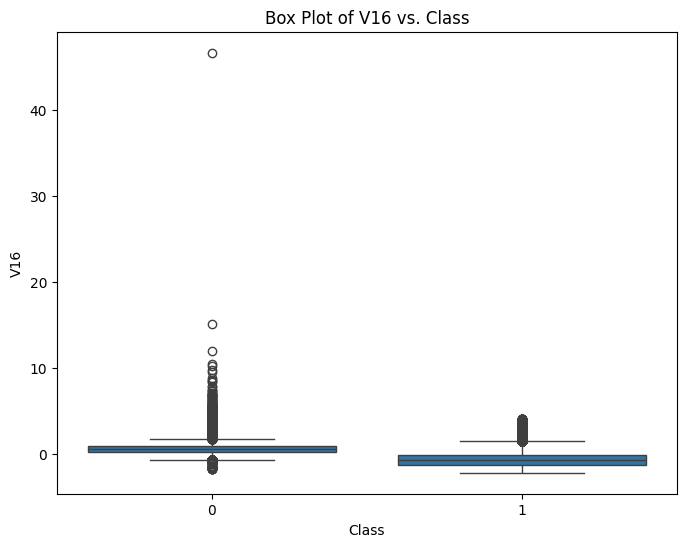

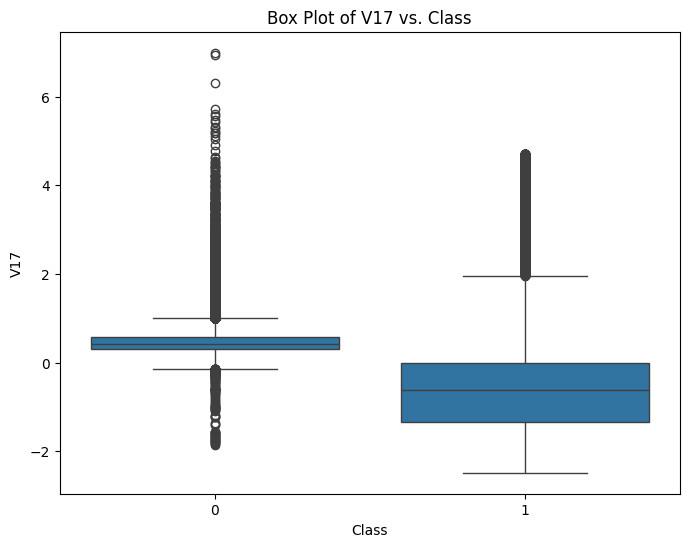

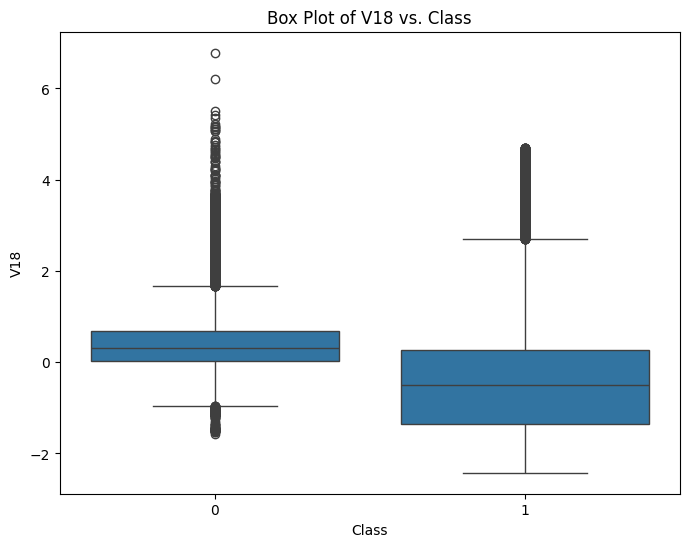

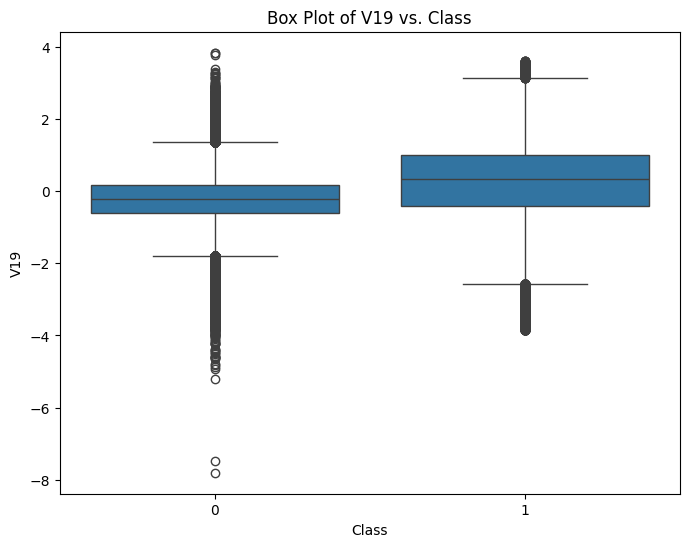

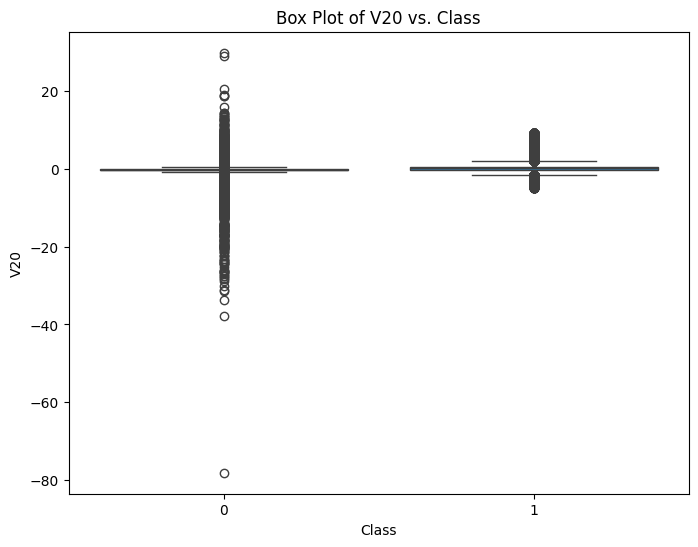

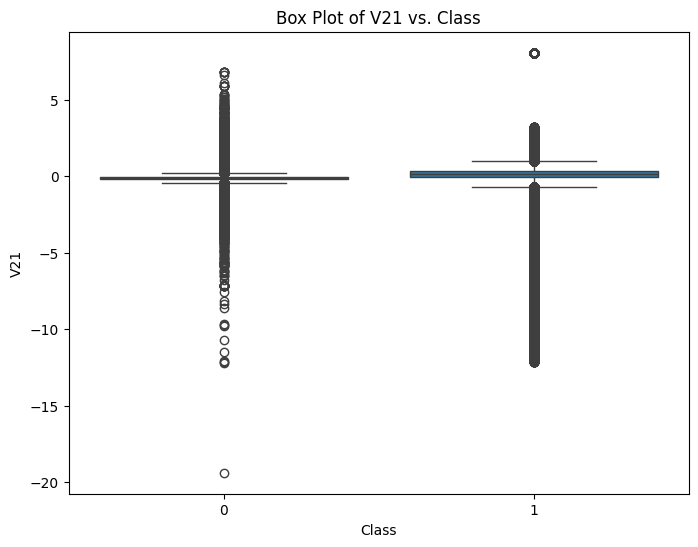

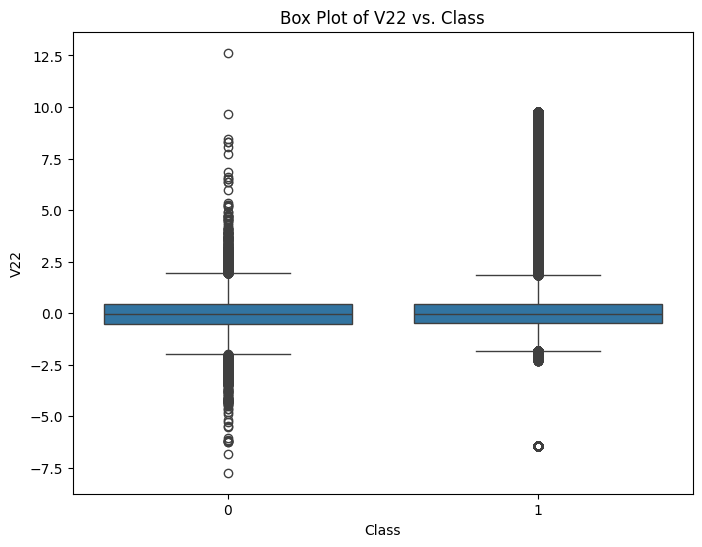

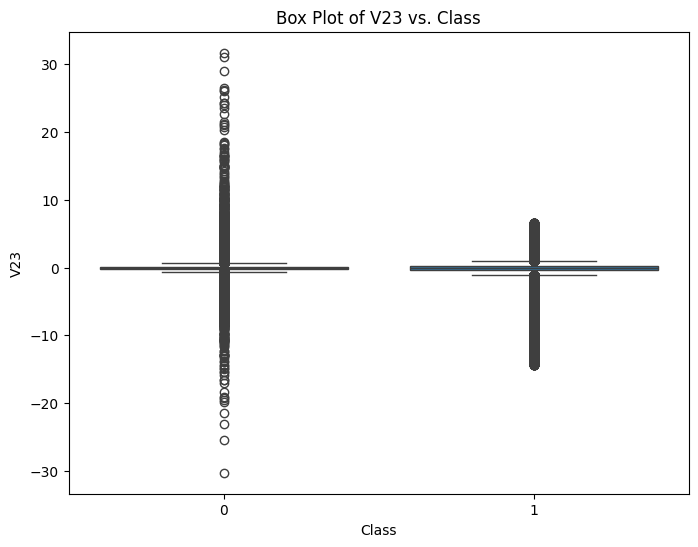

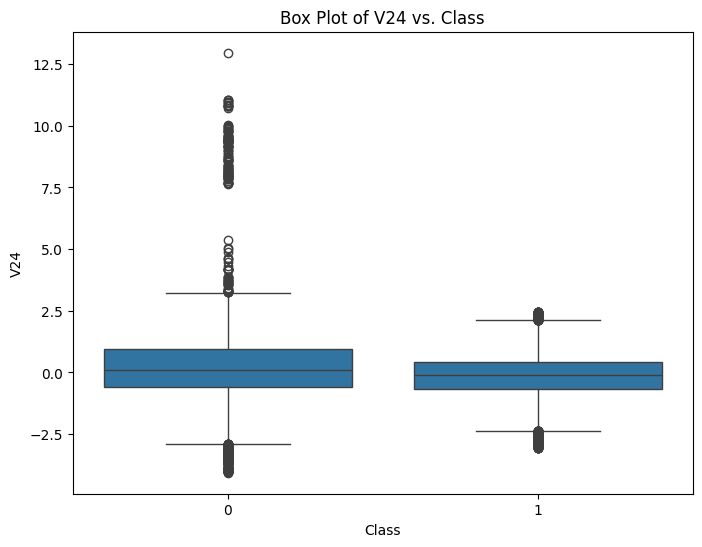

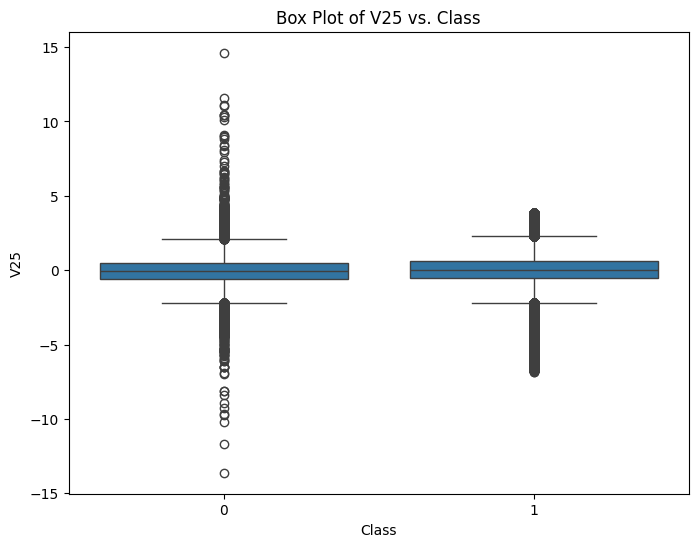

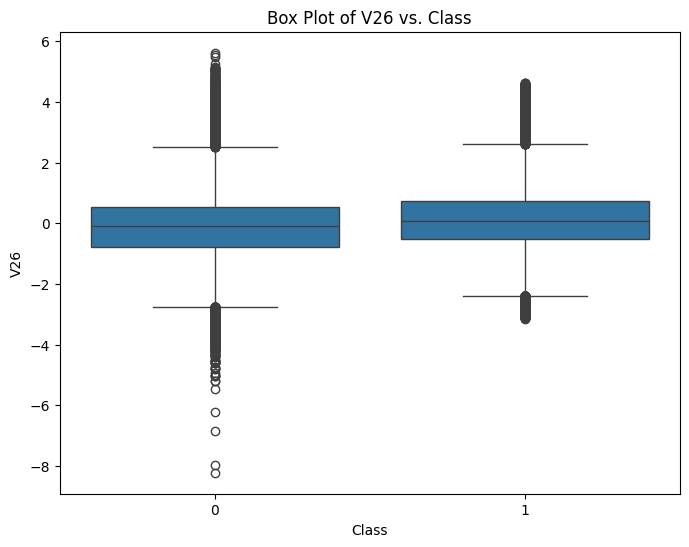

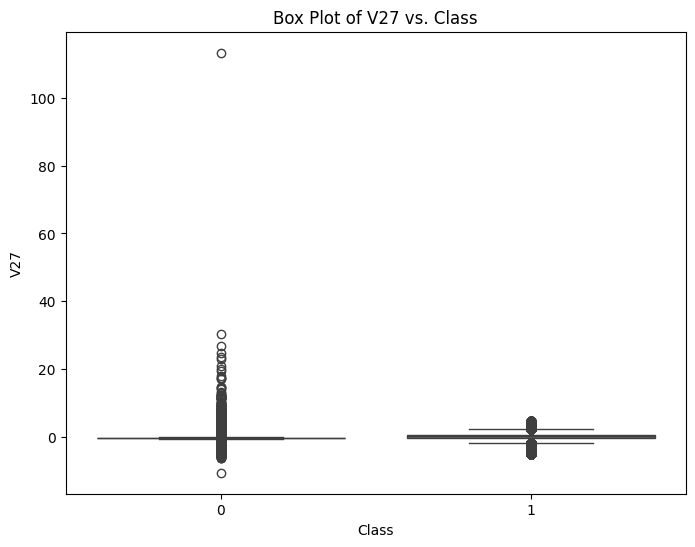

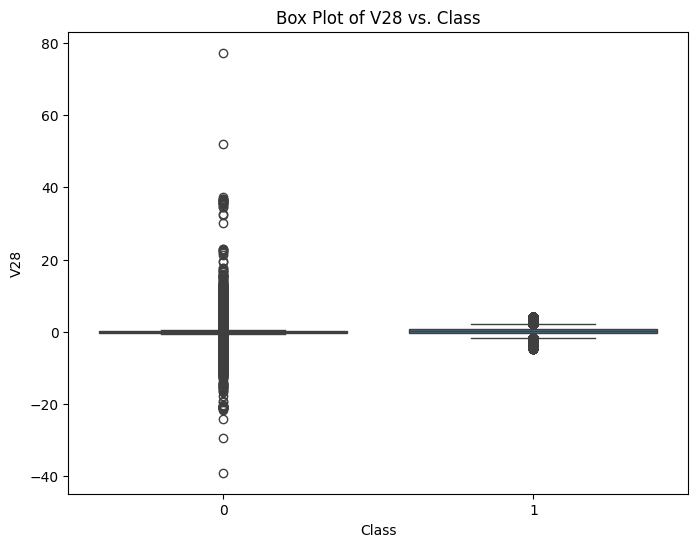

In [12]:
# Create box plots for v1 to v28
for i in range(1, 29): #
  plt.figure(figsize=(8, 6))
  sns.boxplot(x='Class', y=f'V{i}', data=df)
  plt.title(f'Box Plot of V{i} vs. Class')
  plt.xlabel('Class')
  plt.ylabel(f'V{i}')
  plt.show()


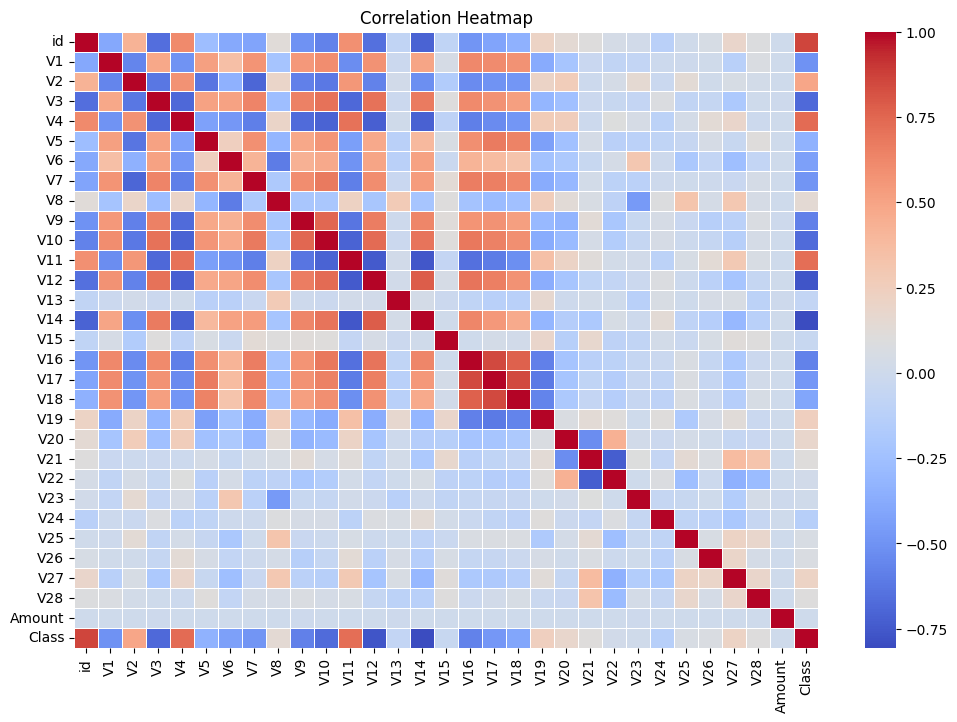

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The presence of correlations in the heatmap between the various components means that feature reduction was not used. There is still dependencies between components and as such further dimensionality reduction can be done to extract the same value from less features.

## 3.1.0 | Dropping unnecessary columns

In [14]:
# Drops the id column which is redundant

df2 = df.drop(df.columns[0], axis=1)

In [15]:
print(df2.columns)
df2.head(5)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


## 3.2.0 | Handling missing data


In [16]:
df2.isnull().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


## 3.3.0 | Feature Reduction

In [17]:
X = df2.drop('Class', axis=1)

mse_values = []  # Store MSE for each number of components
n_components_range = range(2, 21)  # Test components from 2 to 21
for n_components in n_components_range:
    # Apply PCA with the current number of components
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # Reconstruct the data
    X_reconstructed = pca.inverse_transform(X_pca)

    # Calculate MSE and store it
    mse = mean_squared_error(X, X_reconstructed)
    mse_values.append(mse)

Reconstruction error is the difference between the original input and the output of a model (Santos Kumar Das et al., 2021). It measures how well a model can recreate the original data from its reduced representation.

[Source](https://www.sciencedirect.com/topics/computer-science/reconstruction-error#:~:text=Reconstruction%20error%20is%20the%20difference,instant%20for%20intensity%20level%20I.)

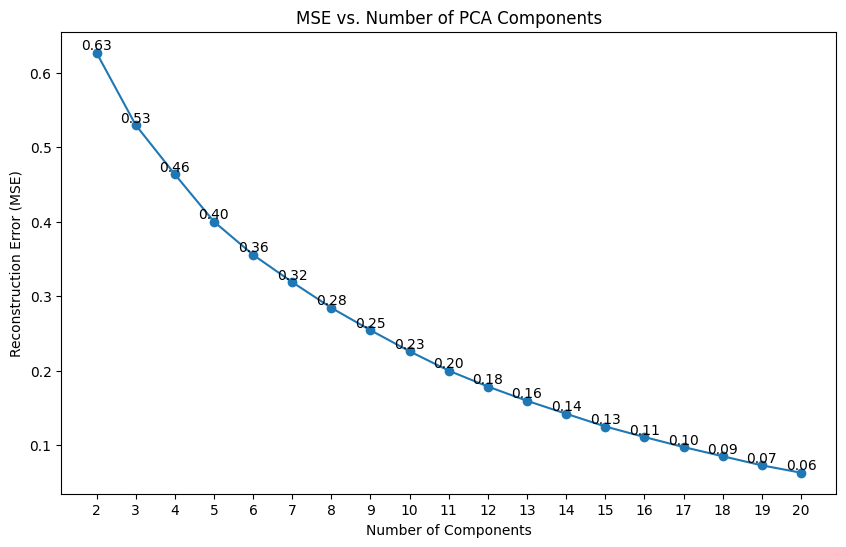

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, mse_values, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error (MSE)')
plt.title('MSE vs. Number of PCA Components')

# Add data labels to the points
for x, y in zip(n_components_range, mse_values):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

# Set x-axis to discrete values
plt.xticks(n_components_range)

plt.show()

In [19]:
pca = PCA(n_components=18)
X_pca = pca.fit_transform(X)

# Reconstruct the data using the PCA components
X_reconstructed = pca.inverse_transform(X_pca)

# Calculate the reconstruction error (MSE)
reconstruction_error = mean_squared_error(X, X_reconstructed)
print(f"Reconstruction Error (MSE): {reconstruction_error}")

Reconstruction Error (MSE): 0.08534539404482383


In [20]:
print(X_pca.shape)

(568630, 18)


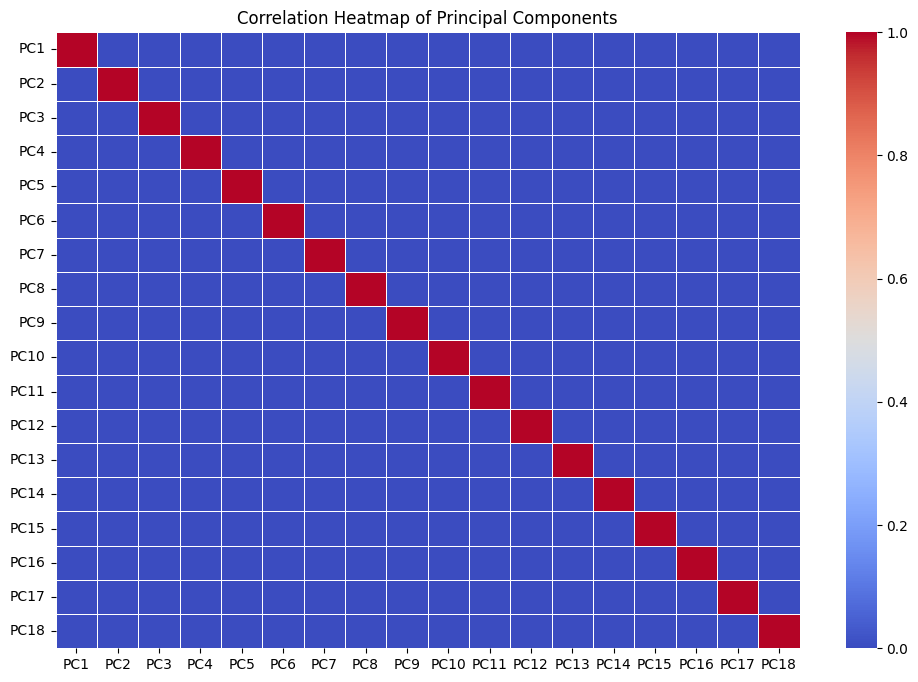

In [21]:
# Create a DataFrame from the PCA-transformed data
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Calculate the correlation matrix
correlation_matrix = pca_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Principal Components')
plt.show()

In [22]:
df2


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [23]:
df2.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,1.991314e-16,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


# 4.0 | Machine Learning Experiments

### 4.0.1 | Experiment Objectives

Credit card fraud involves the deceptive and unauthorized use of a person’s credit card to make purchases or withdraw funds.

One of the most widespread financial frauds globally, causing financial losses for cardholders, merchants and banks alike.

Evolving fraud tactics expose flaws in traditional methods, causing missed cases and false positives—eroding trust in banking and highlighting the need for advanced data-driven solutions.

This project seeks to use machine learning models to assist in the identification of fraudulent cases to minimize the loss of money to fraud.  



In this case, the problem is a binary one. A transaction can either be fraudulent (1) or not (0). Therefore the machine models chosen should be chosen according to how well they perform binary classification.

### 4.0.2 | Models utilised

The intended models and their justifications are as follows:

XGBoost – Handles imbalanced data well, offers strong interpretability, and efficiently detects complex fraud patterns.

LightGBM – Faster and more memory-efficient than XGBoost, making it ideal for large datasets.

Logistic regression – A simple, easy to implement, interpretable model that provides probabilistic predictions.

### 4.0.3 | Modelling as an optimization problem

F1 is a metric used to evaluate a classifer working especially well in cases where the dataset is imbalanced. In this dataset, however, as was shown earlier, there is an equal distribution of fraudulent and non-fraudulent cases. This metric will still be the primary method of evaluating the three models but will be supported by other evaluation metrics such as MCC and Accuracy.

$F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$


Problem Formulation:
The F1 score is the mean of precision and recall, defined as:
$
F1= \frac{TP}{ TP + 0.5 \cdot (FP + FN)} ​$
where:

$TP$ is the number of true positives.
$FP$ is the number of false positives.
$FN$ is the number of false negatives.

To maximize the F1 score, the objective function is formulated as follows:
$ \max_{\theta} F_1(\theta) = \max_{\theta} \frac{TP(\theta)}{TP(\theta) + 0.5 \cdot(FP(\theta) + FN(\theta))}$
where $ \theta $ represents the model parameters

### 4.0.4 | Useful Functions

In [24]:
models = [LogisticRegression(),xgb.XGBClassifier(),lgb.LGBMClassifier(early_stopping_round=3)]
model_names = ['Logistic Regression','XGBoost','LightGBM']

Early stopping rounds parameter helped to prevent the splitting warning for the lightgbm model. No further splitting could be done which would also yield information gain.

https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

In [25]:
def evaluate_model(model, X_train_m, X_test_m, y_train_m, y_test_m):
    model_pipeline = Pipeline([
      ('scaler', RobustScaler()),
      ('model', model)
    ])
    start_time = time()
    if 'early_stopping_round' in model.get_params():
        model_pipeline.fit(X_train_m, y_train_m, model__eval_set=[(X_test_m, y_test_m)], model__eval_metric='auc')
    else:
        model_pipeline.fit(X_train_m, y_train_m)
    end_time = time()
    training_time = end_time - start_time
    y_pred = model_pipeline.predict(X_test_m)
    accuracy = accuracy_score(y_test_m, y_pred)
    return {'Accuracy': accuracy, 'y_pred': y_pred, 'model': model_pipeline, 'training_time': training_time}

In the initial iterations of the project, no pipeline was utilised. It was only until the XGBoost model produced a warning about scaling was the idea to set up scaling implemented.

Scaling as was learned helps boost the performance of ML models by ensuring features are on a similar scale. As shown earlier with the box plot over the features, this dataset contained a heavy amount of outliers (not unexpected for a dataset of this type where outliers are the point) and through experimentation, it was noted that scaling the features led to both a performance boost in both the quality and speed of each of the models.   

In [26]:
def get_confusion_matrix(model_results, y_test):
    plt.figure(figsize=(10, 3))
    # No feature reduction
    j = 1
    for i in model_results.items():
      model_name = i[0]
      plt.subplot(1, 3, j)
      cm_model = confusion_matrix(y_test, i[1]['y_pred'])
      sns.heatmap(cm_model, annot=True, fmt="d", cmap="Blues")
      plt.title(model_name)
      j+=1
    plt.tight_layout()
    plt.show()

## 4.1.0 | No feature reduction vs feature reduction

[Link to evaluate model function](https://colab.research.google.com/drive/1BYX7oMQdkjJilrD9MPy5IWMiBh4x4bKY?authuser=1#scrollTo=j4VP2PuQIJbv&line=3&uniqifier=1)

### 4.1.1 | No Feature Reduction

In [28]:
model_performance_nfr = {}
X1 = df.drop(df.columns[0], axis=1)
y1 = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
for i in range(len(models)):
    model = models[i]
    model_name = model_names[i] + " (no feature reduction)"
    results = evaluate_model(model, X_train, X_test, y_train, y_test)
    model_performance_nfr[model_name] = results
    print(f"{model_name} Accuracy: {results['Accuracy']}")
    print(classification_report(y_test, results['y_pred']))

Logistic Regression (no feature reduction) Accuracy: 0.9999472416158135
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

XGBoost (no feature reduction) Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 227339, number of negative: 227565
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7397
[LightGBM] [Info] Number of data points in the train set: 454904, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499752 -> initscore=-0.000994
[LightGBM] [Info] Start training from score -0.000994
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's binary_loglos

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### 4.1.2 | Feature Reduction

In [29]:
X2 = pd.DataFrame(X_pca)
y2 = df2['Class']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

model_performance_fr = {}
for i in range(len(models)):
    model = models[i]
    model_name = model_names[i] + " (w/ feature reduction)"
    results = evaluate_model(model, X_train2, X_test2, y_train2, y_test2)
    model_performance_fr[model_name] = results
    print(f"{model_name} Accuracy: {results['Accuracy']}")
    print(classification_report(y_test2, results['y_pred']))

Logistic Regression (w/ feature reduction) Accuracy: 0.9598332835059705
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     56750
           1       0.98      0.94      0.96     56976

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726

XGBoost (w/ feature reduction) Accuracy: 0.9993932785818547
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 227339, number of negative: 227565
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.162330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4590
[LightGBM] [Info] Number of data points in the train set: 454904, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499752 -> initscore=-0.000994
[LightGBM] [Info] Start training from score -0.000994
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.972271	valid_0's binary_logloss: 0.262142
LightGBM (w/ feature reduction) Accuracy: 0.9734977050102879
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     56750
           1       0.99      0.96      0.97     56976

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted av

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### 4.1.3 | Comparison

#### 4.1.3.1 | Accuracy

In [30]:
# Create an empty list to store the model data
model_data = []

# Iterate through the model performance dictionaries
for model_name, results in model_performance_nfr.items():
  if "(no feature reduction)" in model_name:
    model_name = model_name.replace(" (no feature reduction)", "")
    model_data.append({'Model': model_name, 'Accuracy': results['Accuracy']})

for model_name, results in model_performance_fr.items():
    if "(w/ feature reduction)" in model_name:
        model_name = model_name.replace(" (w/ feature reduction)", "")
        for data_point in model_data:
            if data_point["Model"] == model_name:
                data_point["Accuracy_FR"] = results["Accuracy"]
                break

# Create the DataFrame
accuracy_df = pd.DataFrame(model_data)

# Display the DataFrame
accuracy_df


,Model,Accuracy,Accuracy_FR
0,Logistic Regression,0.999947,0.959833
1,XGBoost,1.000000,0.999393
2,LightGBM,1.000000,0.973498


#### 4.1.3.2 | F1 Score

In [31]:
# Create an empty list to store the model data
f1_data = []

# Iterate through the model performance dictionaries
for model_name, results in model_performance_nfr.items():
  if "(no feature reduction)" in model_name:
    model_name = model_name.replace(" (no feature reduction)", "")
    f1 = f1_score(y_test, results['y_pred'])
    f1_data.append({'Model': model_name, 'F1 Score': f1})

for model_name, results in model_performance_fr.items():
    if "(w/ feature reduction)" in model_name:
        model_name = model_name.replace(" (w/ feature reduction)", "")
        for data_point in f1_data:
            if data_point["Model"] == model_name:
                f1 = f1_score(y_test, results['y_pred'])
                data_point["F1 Score_FR"] = f1
                break

# Create the DataFrame
f1_df = pd.DataFrame(f1_data)

# Display the DataFrame
f1_df


,Model,F1 Score,F1 Score_FR
0,Logistic Regression,0.999947,0.959235
1,XGBoost,1.000000,0.999395
2,LightGBM,1.000000,0.973102


#### 4.1.3.3 | Confusion Matrices

[Link to confusion matrix function](https://colab.research.google.com/drive/1BYX7oMQdkjJilrD9MPy5IWMiBh4x4bKY?authuser=1#scrollTo=9RcvRqo-Ngp4&line=3&uniqifier=1)

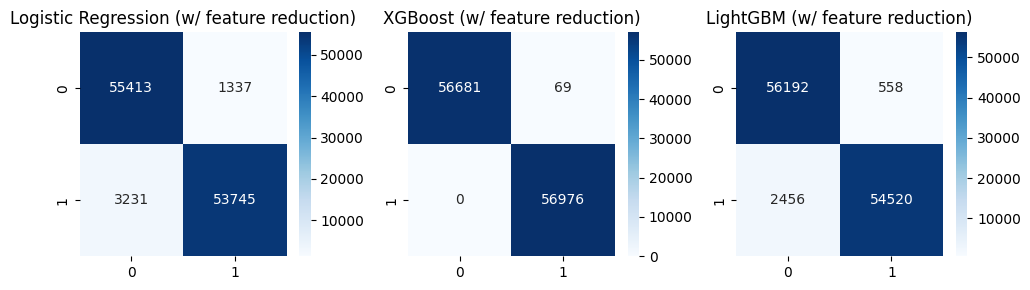

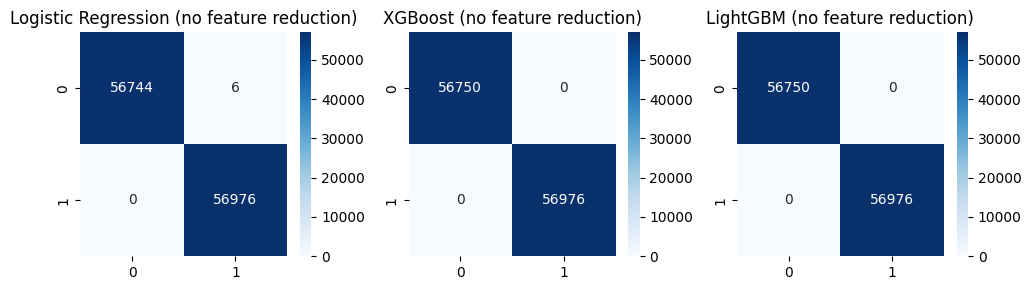

In [32]:
get_confusion_matrix(model_performance_fr, y_test)
get_confusion_matrix(model_performance_nfr, y_test)

#### 4.1.3.4 | MCC

In [33]:
mcc_data = []

# Iterate through the model performance dictionaries
for model_name, results in model_performance_nfr.items():
  if "(no feature reduction)" in model_name:
    model_name = model_name.replace(" (no feature reduction)", "")
    mcc = matthews_corrcoef(y_test, results['y_pred'])
    mcc_data.append({'Model': model_name, 'MCC': mcc})

for model_name, results in model_performance_fr.items():
    if "(w/ feature reduction)" in model_name:
        model_name = model_name.replace(" (w/ feature reduction)", "")
        for data_point in mcc_data:
            if data_point["Model"] == model_name:
                mcc = matthews_corrcoef(y_test, results['y_pred'])
                data_point["MCC_FR"] = mcc
                break

# Create the DataFrame
mcc_df = pd.DataFrame(mcc_data)

# Display the DataFrame
mcc_df


,Model,MCC,MCC_FR
0,Logistic Regression,0.999894,0.920182
1,XGBoost,1.000000,0.998787
2,LightGBM,1.000000,0.947527


## 4.2.0 | Use of K-fold

[Link to evaluate model function](https://colab.research.google.com/drive/1BYX7oMQdkjJilrD9MPy5IWMiBh4x4bKY?authuser=1#scrollTo=j4VP2PuQIJbv&line=3&uniqifier=1)

### 4.2.1 | K-fold

In [36]:
# Define the number of folds for KFold cross-validation
n_splits = 5

# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Function to perform KFold cross-validation for a given model
def kfold_cv(model, X, y):
    model_results = []
    mcc_scores = []
    f1_scores = []
    for train_index, test_index in kf.split(X):
        if isinstance(X, np.ndarray):
              X = pd.DataFrame(X)

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        results = evaluate_model(model, X_train, X_test, y_train, y_test)
        mcc_scores.append(matthews_corrcoef(y_test, results['y_pred']))
        f1_scores.append(f1_score(y_test, results['y_pred']))
        model_results.append(results)
    return model_results, mcc_scores, f1_scores


# Perform KFold cross-validation for each model and dataset (with/without feature reduction)
model_performance_nfr_kf = {}
mcc_nfr_kf = {}
f1_nfr_kf = {}
for i in range(len(models)):
    model = models[i]
    model_name = model_names[i] + " (no feature reduction, kf)"
    results, mcc_scores_nfr, f1_scores_nfr = kfold_cv(model, X1, y1)
    model_performance_nfr_kf[model_name] = results
    mcc_nfr_kf[model_name] = mcc_scores_nfr
    f1_nfr_kf[model_name] = f1_scores_nfr
    print(f"{model_name}")
    accuracy_scores = [fold['Accuracy'] for fold in results]
    print("Accuracy Scores per fold:", accuracy_scores)
    print(f"Mean Accuracy: {np.mean(accuracy_scores)}")
    print("-" * 20)


model_performance_fr_kf = {}
mcc_fr_kf = {}
f1_fr_kf = {}
for i in range(len(models)):
    model = models[i]
    model_name = model_names[i] + " (w/ feature reduction, kf)"
    results, mcc_scores_fr, f1_scores_fr = kfold_cv(model, X2, y2)
    model_performance_fr_kf[model_name] = results
    mcc_fr_kf[model_name] = mcc_scores_fr
    f1_fr_kf[model_name] = f1_scores_fr
    print(f"{model_name}")
    accuracy_scores = [fold['Accuracy'] for fold in results]
    print("Accuracy Scores per fold:", accuracy_scores)
    print(f"Mean Accuracy: {np.mean(accuracy_scores)}")
    print("-" * 20)

Logistic Regression (no feature reduction, kf)
Accuracy Scores per fold: [0.9999472416158135, 0.9999912069359689, 1.0, 0.9999824138719379, 0.9999648277438756]
Mean Accuracy: 0.9999771380335192
--------------------
XGBoost (no feature reduction, kf)
Accuracy Scores per fold: [1.0, 1.0, 1.0, 1.0, 1.0]
Mean Accuracy: 1.0
--------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 227339, number of negative: 227565
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.252927 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7397
[LightGBM] [Info] Number of data points in the train set: 454904, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499752 -> initscore=-0.000994
[LightGBM] [Info] Start training from score -0.000994
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.59814


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 227539, number of negative: 227365
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.148200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7397
[LightGBM] [Info] Number of data points in the train set: 454904, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500191 -> initscore=0.000765
[LightGBM] [Info] Start training from score 0.000765
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.698327


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 227450, number of negative: 227454
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.148465 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7397
[LightGBM] [Info] Number of data points in the train set: 454904, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499996 -> initscore=-0.000018
[LightGBM] [Info] Start training from score -0.000018
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.598139


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 227393, number of negative: 227511
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7397
[LightGBM] [Info] Number of data points in the train set: 454904, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499870 -> initscore=-0.000519
[LightGBM] [Info] Start training from score -0.000519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's binary_loglos

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 227539, number of negative: 227365
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.147424 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7397
[LightGBM] [Info] Number of data points in the train set: 454904, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500191 -> initscore=0.000765
[LightGBM] [Info] Start training from score 0.000765
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.698327
LightGBM (no feature reduction, kf)
Accuracy Scores 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Logistic Regression (w/ feature reduction, kf)
Accuracy Scores per fold: [0.9598332835059705, 0.9600443170427168, 0.9605279355644267, 0.9594375956245713, 0.958742943566115]
Mean Accuracy: 0.9597172150607601
--------------------
XGBoost (w/ feature reduction, kf)
Accuracy Scores per fold: [0.9993141410055748, 0.9993932785818547, 0.9993317271336369, 0.9994548300300723, 0.9995163814782899]
Mean Accuracy: 0.9994020716458858
--------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 227339, number of negative: 227565
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.077630 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4590
[LightGBM] [Info] Number of data points in the train set: 454904, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499752 -> initscore=-0.000994
[LightGBM] [Info] Start training from score -0.000994
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[15]	valid_0's auc: 0.975998	valid_0's binary_logloss: 0.232849


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 227539, number of negative: 227365
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4590
[LightGBM] [Info] Number of data points in the train set: 454904, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500191 -> initscore=0.000765
[LightGBM] [Info] Start training from score 0.000765
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.971885	valid_0's binary_logloss: 0.210612


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 227450, number of negative: 227454
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080825 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4590
[LightGBM] [Info] Number of data points in the train set: 454904, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499996 -> initscore=-0.000018
[LightGBM] [Info] Start training from score -0.000018
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.980795	valid_0's binary_logloss: 0.197446


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 227393, number of negative: 227511
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082835 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4590
[LightGBM] [Info] Number of data points in the train set: 454904, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499870 -> initscore=-0.000519
[LightGBM] [Info] Start training from score -0.000519
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.965341	valid_0's binary_logloss: 0.352809


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 227539, number of negative: 227365
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4590
[LightGBM] [Info] Number of data points in the train set: 454904, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500191 -> initscore=0.000765
[LightGBM] [Info] Start training from score 0.000765
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.988232	valid_0's binary_logloss: 0.1866


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM (w/ feature reduction, kf)
Accuracy Scores per fold: [0.9746935617185164, 0.9787471642368499, 0.9803123296343844, 0.9716335754356963, 0.9846473102017129]
Mean Accuracy: 0.978006788245432
--------------------


Shuffle was set to true. In a standard dataset for credit card transactions, time sensitive data would be used, making shuffling the data infeasible for accurately training a model. However, this data is anonymised and transformed and as such that concern is alleviated.

### 4.2.2 | Comparison

In [ ]:
n_splits = 5

In [74]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        axes[i].annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#### 4.2.2.1 | Accuracy

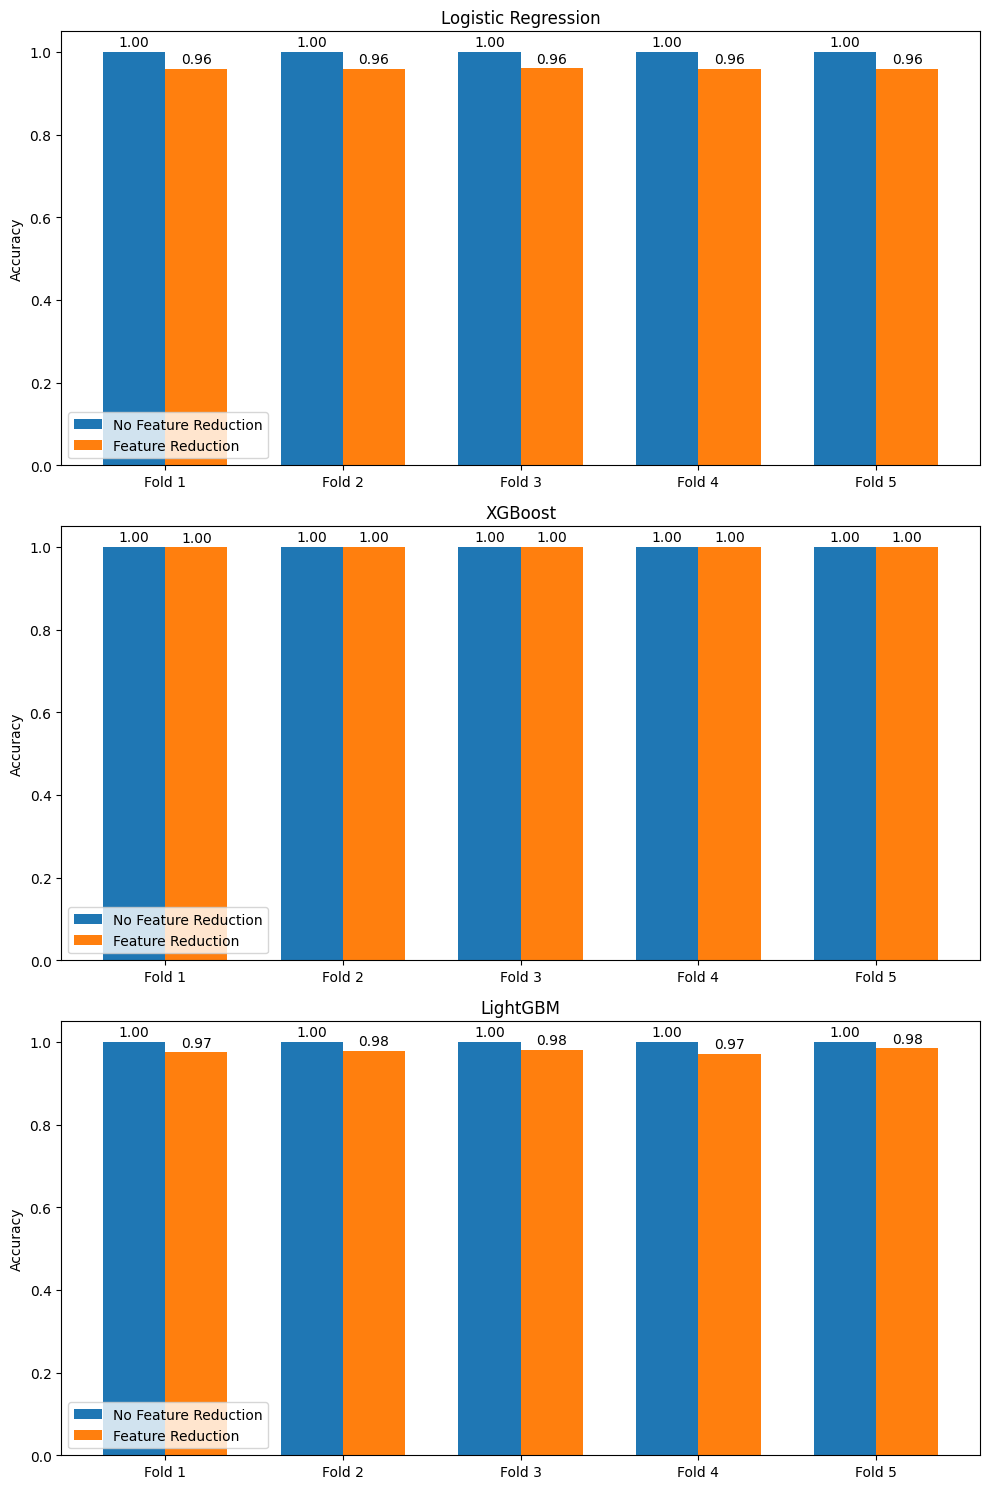

In [75]:
# Create subplots for each model
fig, axes = plt.subplots(len(model_names), 1, figsize=(10, 5 * len(model_names)))

for i, model_name in enumerate(model_names):
  # Get the accuracy scores for each fold with and without feature reduction
    nfr_accuracies = [fold['Accuracy'] for fold in model_performance_nfr_kf[model_name + ' (no feature reduction, kf)']]
    fr_accuracies = [fold['Accuracy'] for fold in model_performance_fr_kf[model_name + ' (w/ feature reduction, kf)']]

    # Create bar chart for the current model
    X_axis = np.arange(n_splits)
    width = 0.35
    rects1 = axes[i].bar(X_axis - width/2, nfr_accuracies, width, label='No Feature Reduction')
    rects2 = axes[i].bar(X_axis + width/2, fr_accuracies, width, label='Feature Reduction')

    # Add labels and title
    axes[i].set_ylabel('Accuracy')
    axes[i].set_title(model_name)
    axes[i].set_xticks(X_axis)
    axes[i].set_xticklabels([f'Fold {j+1}' for j in range(n_splits)])
    axes[i].legend()

    autolabel(rects1)
    autolabel(rects2)



plt.tight_layout()
plt.show()


#### 4.2.2.2 | F1 Score

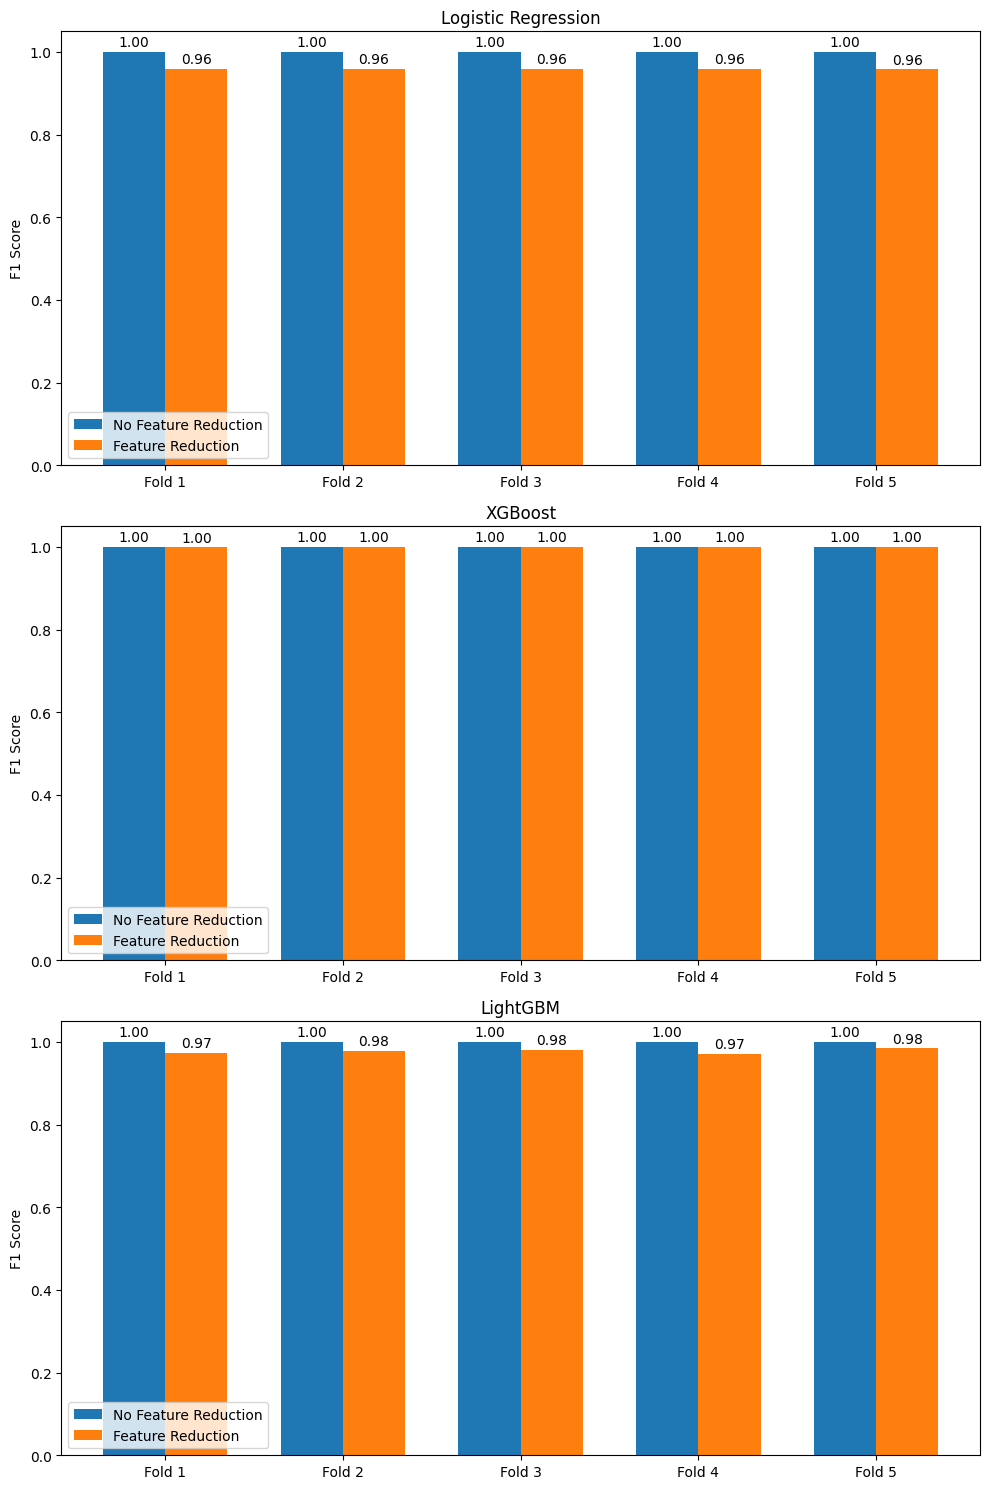

In [76]:
# Create subplots for each model
fig, axes = plt.subplots(len(model_names), 1, figsize=(10, 5 * len(model_names)))

for i, model_name in enumerate(model_names):
    # Get the F1 scores for each fold with and without feature reduction
    nfr_f1_scores = f1_nfr_kf[model_name + ' (no feature reduction, kf)']
    fr_f1_scores = f1_fr_kf[model_name + ' (w/ feature reduction, kf)']

    # Create bar chart for the current model
    X_axis = np.arange(n_splits)
    width = 0.35
    rects1 = axes[i].bar(X_axis - width/2, nfr_f1_scores, width, label='No Feature Reduction')
    rects2 = axes[i].bar(X_axis + width/2, fr_f1_scores, width, label='Feature Reduction')

    # Add labels and title
    axes[i].set_ylabel('F1 Score')
    axes[i].set_title(model_name)
    axes[i].set_xticks(X_axis)
    axes[i].set_xticklabels([f'Fold {j+1}' for j in range(n_splits)])
    axes[i].legend()

    # Add data labels to the bars
    autolabel(rects1)
    autolabel(rects2)


plt.tight_layout()
plt.show()


#### 4.2.2.3 | MCC

In [41]:
mcc_data_kf = []

# Iterate through the model performance dictionaries for no feature reduction
for model_name, results in mcc_nfr_kf.items():
    if "(no feature reduction, kf)" in model_name:
        model_name = model_name.replace(" (no feature reduction, kf)", "")
        mcc_data_kf.append({'Model': model_name, 'MCC_mean': np.mean(results)})

for model_name, results in mcc_fr_kf.items():
    if "(w/ feature reduction, kf)" in model_name:
        model_name = model_name.replace(" (w/ feature reduction, kf)", "")
        for data_point in mcc_data_kf:
            if data_point["Model"] == model_name:
                data_point["MCC_mean_FR"] = np.mean(results)
                break

# Create the DataFrame
mcc_df_kf = pd.DataFrame(mcc_data_kf)

# Display the DataFrame
mcc_df_kf


,Model,MCC_mean,MCC_mean_FR
0,Logistic Regression,0.999954,0.919948
1,XGBoost,1.000000,0.998805
2,LightGBM,1.000000,0.956371


#### 4.2.2.4 | Model Mean and Std deviation

In [49]:
def summarize_kfold_results(results_dict):
    summary_data = []
    for model_name, results in results_dict.items():
        accuracy_scores = [fold['Accuracy'] for fold in results]
        mean_accuracy = np.mean(accuracy_scores)
        std_accuracy = np.std(accuracy_scores)
        summary_data.append({
            'Model': model_name,
            'Accuracy (Mean)': mean_accuracy,
            'Accuracy (Std Dev)': std_accuracy
        })
    return pd.DataFrame(summary_data)

In [50]:
# Summarize results for models without feature reduction
nfr_summary_df = summarize_kfold_results(model_performance_nfr_kf)
print("Models without feature reduction:")
nfr_summary_df


Models without feature reduction:


,Model,Accuracy (Mean),Accuracy (Std Dev)
0,"Logistic Regression (no feature reduction, kf)",0.999977,0.000019
1,"XGBoost (no feature reduction, kf)",1.000000,0.000000
2,"LightGBM (no feature reduction, kf)",1.000000,0.000000


In [51]:
# Summarize results for models with feature reduction
fr_summary_df = summarize_kfold_results(model_performance_fr_kf)
print("\nModels with feature reduction:")
fr_summary_df



Models with feature reduction:


,Model,Accuracy (Mean),Accuracy (Std Dev)
0,"Logistic Regression (w/ feature reduction, kf)",0.959717,0.000601
1,"XGBoost (w/ feature reduction, kf)",0.999402,0.000076
2,"LightGBM (w/ feature reduction, kf)",0.978007,0.004507


# 5.0 | Summary Metrics and discussion

## 5.1.0 | Summary Metrics

In [55]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        axes[i].annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

The results of [Feature reduction vs no feature reduction](https://colab.research.google.com/drive/1BYX7oMQdkjJilrD9MPy5IWMiBh4x4bKY?authuser=1#scrollTo=8v3Ch_4P4My0) will be used here for comparison.

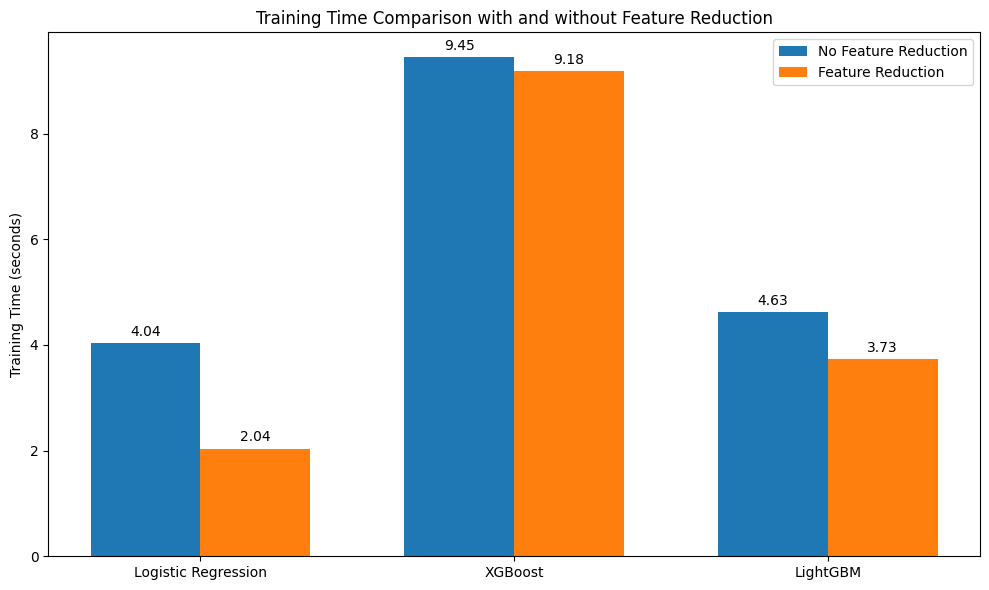

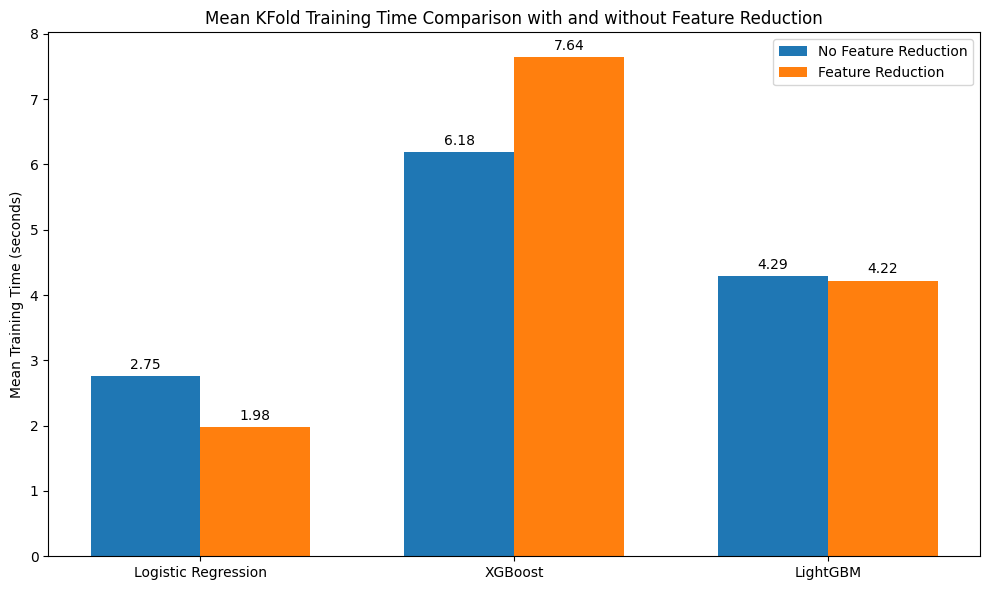

In [73]:
# Extract training times
nfr_training_times = {model_name: results['training_time'] for model_name, results in model_performance_nfr.items()}
fr_training_times = {model_name: results['training_time'] for model_name, results in model_performance_fr.items()}

# Create a DataFrame for comparison
time_comparison_data = []
for model_name in model_names:
  time_comparison_data.append({
      'Model': model_name,
      'No Feature Reduction Time (s)': nfr_training_times[model_name + ' (no feature reduction)'],
      'Feature Reduction Time (s)': fr_training_times[model_name + ' (w/ feature reduction)']
  })


# Visualize the training times
plt.figure(figsize=(10, 6))

bar_width = 0.35
x = np.arange(len(model_names))

rects1 = plt.bar(x - bar_width/2, time_comparison_df['No Feature Reduction Time (s)'], bar_width, label='No Feature Reduction')
rects2 = plt.bar(x + bar_width/2, time_comparison_df['Feature Reduction Time (s)'], bar_width, label='Feature Reduction')

plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison with and without Feature Reduction')
plt.xticks(x, model_names)
plt.legend()

autolabel_time(rects1)
autolabel_time(rects2)

plt.tight_layout()
plt.show()

# Also compare average training time from KFold
kfold_time_data = []
for model_name in model_names:
    # Get training times for each fold for no feature reduction
    nfr_fold_times = [fold['training_time'] for fold in model_performance_nfr_kf[model_name + ' (no feature reduction, kf)']]
    mean_nfr_time = np.mean(nfr_fold_times)

    # Get training times for each fold for feature reduction
    fr_fold_times = [fold['training_time'] for fold in model_performance_fr_kf[model_name + ' (w/ feature reduction, kf)']]
    mean_fr_time = np.mean(fr_fold_times)

    kfold_time_data.append({
        'Model': model_name,
        'Mean KFold Time (No FR)': mean_nfr_time,
        'Mean KFold Time (W/ FR)': mean_fr_time
    })


# Visualize the KFold training times
plt.figure(figsize=(10, 6))

rects1_kf = plt.bar(x - bar_width/2, kfold_time_df['Mean KFold Time (No FR)'], bar_width, label='No Feature Reduction')
rects2_kf = plt.bar(x + bar_width/2, kfold_time_df['Mean KFold Time (W/ FR)'], bar_width, label='Feature Reduction')

plt.ylabel('Mean Training Time (seconds)')
plt.title('Mean KFold Training Time Comparison with and without Feature Reduction')
plt.xticks(x, model_names)
plt.legend()

autolabel_time(rects1_kf)
autolabel_time(rects2_kf)

plt.tight_layout()
plt.show()

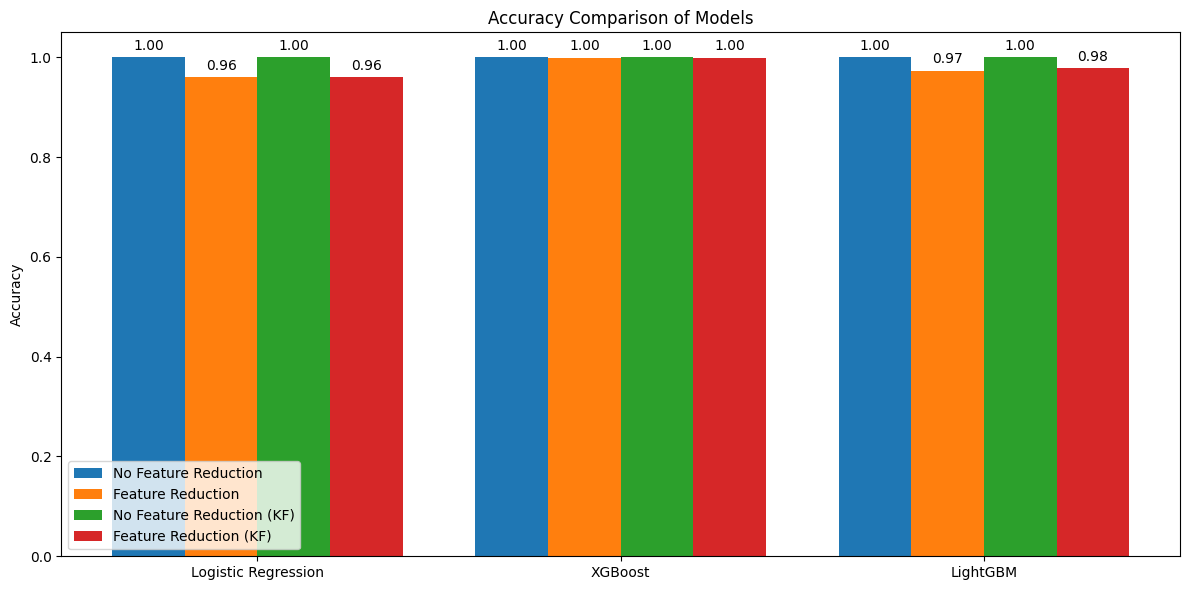

In [63]:
# Extract accuracy scores for the bar chart
accuracy_data = []
for model_name in model_names:
    accuracy_data.append({
        'Model': model_name,
        'No Feature Reduction': model_performance_nfr[model_name + ' (no feature reduction)']['Accuracy'],
        'Feature Reduction': model_performance_fr[model_name + ' (w/ feature reduction)']['Accuracy'],
        'No Feature Reduction (KF)': np.mean([fold['Accuracy'] for fold in model_performance_nfr_kf[model_name + ' (no feature reduction, kf)']]),
        'Feature Reduction (KF)': np.mean([fold['Accuracy'] for fold in model_performance_fr_kf[model_name + ' (w/ feature reduction, kf)']])
    })

accuracy_df = pd.DataFrame(accuracy_data)


# Create the bar chart
x = np.arange(len(model_names))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - 1.5*width, accuracy_df['No Feature Reduction'], width, label='No Feature Reduction')
rects2 = ax.bar(x - 0.5*width, accuracy_df['Feature Reduction'], width, label='Feature Reduction')
rects3 = ax.bar(x + 0.5*width, accuracy_df['No Feature Reduction (KF)'], width, label='No Feature Reduction (KF)')
rects4 = ax.bar(x + 1.5*width, accuracy_df['Feature Reduction (KF)'], width, label='Feature Reduction (KF)')

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison of Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
plt.show()


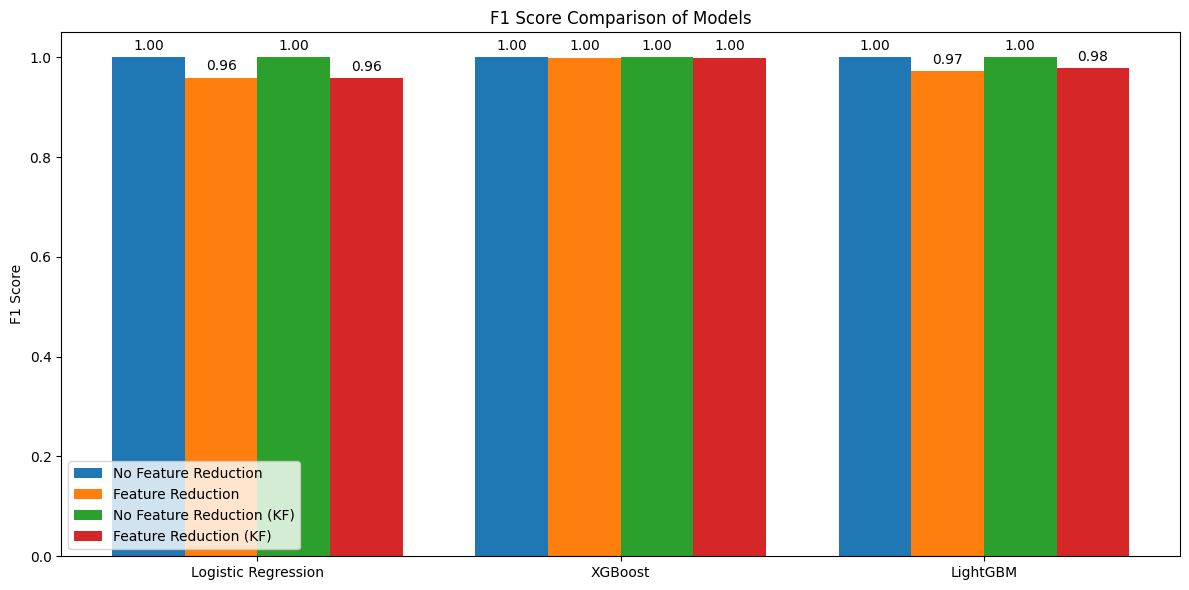

In [68]:
# Extract F1 scores for the bar chart
f1_data = []
for model_name in model_names:
    f1_data.append({
        'Model': model_name,
        'No Feature Reduction': f1_score(y_test, model_performance_nfr[model_name + ' (no feature reduction)']['y_pred']),
        'Feature Reduction': f1_score(y_test2, model_performance_fr[model_name + ' (w/ feature reduction)']['y_pred']),
        'No Feature Reduction (KF)': np.mean(f1_nfr_kf[model_name + ' (no feature reduction, kf)']),
        'Feature Reduction (KF)': np.mean(f1_fr_kf[model_name + ' (w/ feature reduction, kf)'])
    })

f1_df = pd.DataFrame(f1_data)

# Create the bar chart
x = np.arange(len(model_names))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - 1.5*width, f1_df['No Feature Reduction'], width, label='No Feature Reduction')
rects2 = ax.bar(x - 0.5*width, f1_df['Feature Reduction'], width, label='Feature Reduction')
rects3 = ax.bar(x + 0.5*width, f1_df['No Feature Reduction (KF)'], width, label='No Feature Reduction (KF)')
rects4 = ax.bar(x + 1.5*width, f1_df['Feature Reduction (KF)'], width, label='Feature Reduction (KF)')

ax.set_ylabel('F1 Score')
ax.set_title('F1 Score Comparison of Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
plt.show()



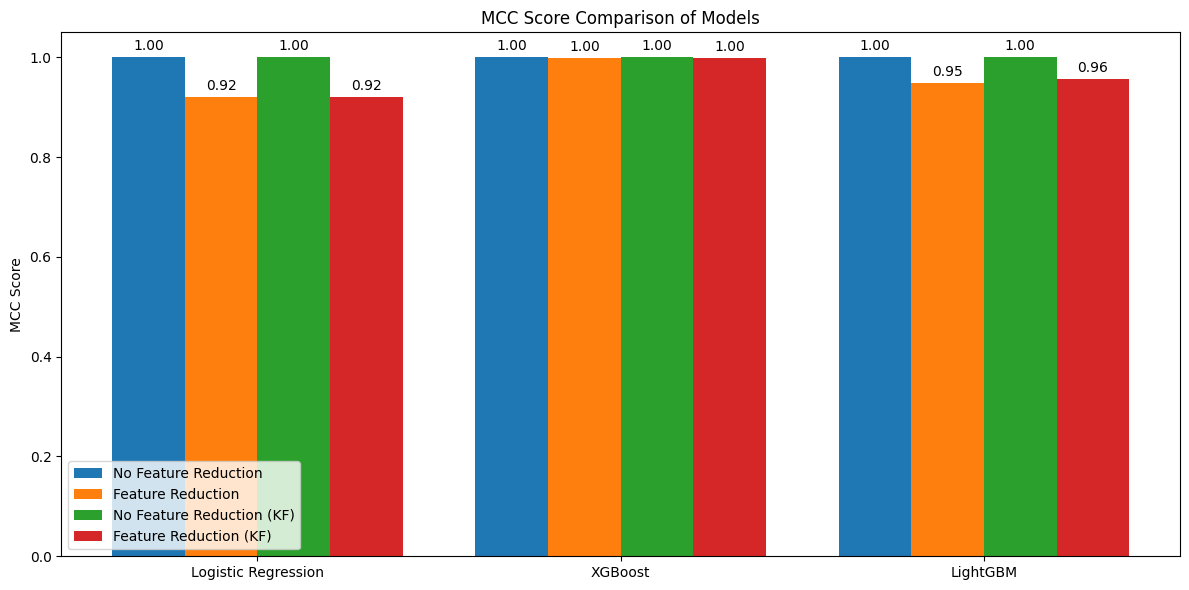

In [67]:
# Extract MCC scores for the bar chart
mcc_data_combined = []
for model_name in model_names:
    mcc_data_combined.append({
        'Model': model_name,
        'No Feature Reduction': matthews_corrcoef(y_test, model_performance_nfr[model_name + ' (no feature reduction)']['y_pred']),
        'Feature Reduction': matthews_corrcoef(y_test2, model_performance_fr[model_name + ' (w/ feature reduction)']['y_pred']),
        'No Feature Reduction (KF)': np.mean(mcc_nfr_kf[model_name + ' (no feature reduction, kf)']),
        'Feature Reduction (KF)': np.mean(mcc_fr_kf[model_name + ' (w/ feature reduction, kf)'])
    })

mcc_df_combined = pd.DataFrame(mcc_data_combined)

# Create the bar chart
x = np.arange(len(model_names))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - 1.5*width, mcc_df_combined['No Feature Reduction'], width, label='No Feature Reduction')
rects2 = ax.bar(x - 0.5*width, mcc_df_combined['Feature Reduction'], width, label='Feature Reduction')
rects3 = ax.bar(x + 0.5*width, mcc_df_combined['No Feature Reduction (KF)'], width, label='No Feature Reduction (KF)')
rects4 = ax.bar(x + 1.5*width, mcc_df_combined['Feature Reduction (KF)'], width, label='Feature Reduction (KF)')

ax.set_ylabel('MCC Score')
ax.set_title('MCC Score Comparison of Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
plt.show()

## 5.2.0 | Discussion

This binary classification project for credit card fraud detection compared three models for their performance and computational efficiency: XGBoost, LightGBM, and Logistic Regression. These were all compared with and without feature reduction, and with and without k-fold cross validation. The models optimized primarily for F1 score while considering training time efficiency.

XGBoost demonstrated robustness across all experiments. Namely it consistenly maintained perfect accuracy, F1, and MCC scores of 1.00 in the cases where feature reduction was and was not performed including across both the k-fold and no k-fold experiements. This consistency places XGBoost as the most reliable performer for detecting fraudulent transactions. However, this performance comes with computational costs, as XGBoost required the longest training times amongst the tested models. Potentially owing to error, applying feature reduction to XGBoost led to increased mean K-fold training time (from 6.18 to 7.64 seconds), which exists at odds to the expected behavior, though standard training time showed general improvement.

LightGBM served as the next runner up in the analysis. Without feature reduction, it achieved perfect-to near perfect performance metrics while requiring less training time than XGBoost (4.63 versus 9.45 seconds). When feature reduction was applied, LightGBM experienced minimal performance degradation (F1 score dropping to 0.97, 0.98 across the k-folds) whilst gaining moderate training efficiency improvements (4.63-> 3.73s and 4.29-> 4.22 seconds across k-folds).

Logistic Regression performed responded the most to feature reduction. Without feature reduction, LR matched the perfect performance of the more complex models, but when feature reduction was done, its F1 and MCC scores declined (to 0.96 and 0.92 respectively). However, this performance trade-off yielded substantial computational benefits, with training time dropping significantly (from 4.04 to 2.04 seconds and 2.75 to 1.98 seconds across folds) when compared to the other models.

This project was not without its potential sources of error. Firstly, this dataset was perfectly balanced across both classes potentially meaning that the data was synthesised. This could mean that the models would perform poorly on unseen legitimate instances allowing fraudulent transactions to go undetected. Another unexpected but potentially suspicious fact is the model performance. With Machine Learning models and real life detection, there is nothing that is 100% guaranteed to catch every fraudulent instance. Notably, however, these models were perfect at producing a perfect score for the observed metrics. This could again be due to a synthethic dataset and consequently could lead to poor performance on unseen data.



## 5.3.0 | Conclusion

In conclusion, these results highlight the considerations required for real-world deployment. In financial environments such as banking where fraud detection is a necessity , XGBoost's (without feature reduction) high performance would make it the preferred choice despite the higher computational requirements. For systems with resource constraints or where rapid training is essential, Logistic Regression with feature reduction may offer the most practical alternative, where the system would suffer a performance reduction for significantly faster execution. Finally, LightGBM provides a middle ground where the system can produce good results with moderate computational requirements.

